In [17]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
NODES = 6
GOAL = 4

ALPHA = 0.02 # Learning rate
GAMMA = 0.05 # discount factor
EXPLORE_PROB = 1.0

In [54]:
R = {
(0, 1): 0,
(0, 2): 0,
(0, 5): -4,
(1, 0): -1,
(1, 2): 5,
(1, 3): 2,
(1, 5): 0,
(2, 0): -5,
(2, 1): 0,
(2, 3): 10,
(2, 5): 8,
(3, 0): 5,
(3, 1): -3,
(3, 2): 4,
(3, 4): 50,
(3, 5): 2,
(4, 0): -10,
(4, 1): -5,
(4, 2): -20,
(4, 3): 0,
(4, 4): 100,
(4, 5): -50,
(5, 0): -15,
(5, 1): 2,
(5, 2): -7,
(5, 3): 0,
(5, 4): 70,
}

Q = {}

In [29]:
def get_actions(current):
    actions = []
    for rx in xrange(NODES):
        if (current, rx) in R:
            actions.append(rx)
    return actions

get_actions(2)

[0, 1, 3, 5]

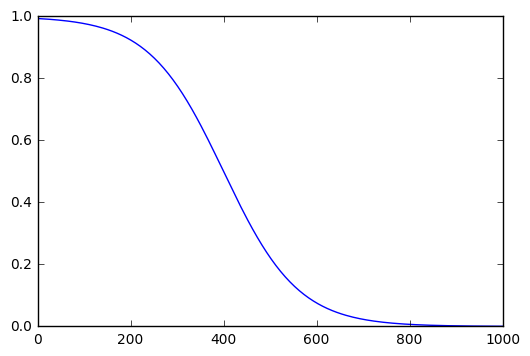

In [42]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def decay(t, total_iter=100, initial_value=None, decay_type='nonlinear'):
    if decay_type=='linear':
        return (N-t)/N
    else:
        return sigmoid(-1 * ((t * 25.0) / (2.0 * total_iter)) + 5)

val = []
N = 1000
for ix in np.linspace(0, N, 200):
    val.append(decay(ix, N, 1.0))
    
plt.plot(np.linspace(0, N, 200), val)



In [44]:
print Q

{}


In [58]:
N_ep = 6
EXPLORE = False
display_path = True
all_rewards = []
for ep in range(N_ep):
    pos = 0 # current state
    rew = 0 # accumulated reward
    steps = 0
    if display_path:
        print pos,
    while (not pos == GOAL) and steps < 10:
    # for kx in range(20):
        # print pos
        steps += 1
        p_act = get_actions(pos)
        
        best_ac = []
        q_best = None
        
        for ac in p_act:
            rq = Q.setdefault((pos, ac), 0)
            if rq > q_best:
                q_best = rq
                best = [ac]
            elif rq == q_best:
                best.append(ac)
        
        # define exploration
        explore_prob = decay(ep, N_ep, EXPLORE_PROB)
        
        if np.random.random() < explore_prob and EXPLORE:
            nxt_pos = random.choice(p_act)
        else:
            nxt_pos = random.choice(best)
        
        if display_path:
            print nxt_pos,
            
        nxt_p_ac = get_actions(nxt_pos)
        
        nq_best = None
        
        for ac in nxt_p_ac:
            rq = Q.setdefault((nxt_pos, ac), 0)
            nq_best = max(nq_best, rq)
        
        Q[(pos, nxt_pos)] = (1- ALPHA)*Q[(pos, nxt_pos)] + ALPHA*(R[(pos, nxt_pos)] + GAMMA*nq_best)
        rew += R[(pos, nxt_pos)]
        pos = nxt_pos
    if display_path:
        print "\nEpisode:", ep, "| Reward:", rew
    all_rewards.append(rew)

0 2 3 4 
Episode: 0 | Reward: 60
0 2 3 4 
Episode: 1 | Reward: 60
0 2 3 4 
Episode: 2 | Reward: 60
0 2 3 4 
Episode: 3 | Reward: 60
0 2 3 4 
Episode: 4 | Reward: 60
0 2 3 4 
Episode: 5 | Reward: 60


In [56]:
for ax in range(NODES):
    for bx in range(NODES):
        if (ax, bx) in Q:
            print (ax, bx), Q[(ax, bx)]

(0, 1) 0.281249947589
(0, 2) 0.625
(0, 5) -0.500000115967
(1, 0) -0.968753318566
(1, 2) 5.62499998685
(1, 3) 4.49943669042
(1, 5) 3.49994268567
(2, 0) -4.96875001077
(2, 1) 0.281249690902
(2, 3) 12.5
(2, 5) 11.4999978387
(3, 0) 5.03089255262
(3, 1) -2.71855836328
(3, 2) 4.62460786654
(3, 4) 50.0
(3, 5) 5.49898926778
(4, 0) 0
(4, 1) 0
(4, 2) 0
(4, 3) 0
(4, 4) 0
(4, 5) 0
(5, 0) -14.9684786569
(5, 1) 2.28118249214
(5, 2) -6.37503574168
(5, 3) 2.49870674742
(5, 4) 69.9999999827


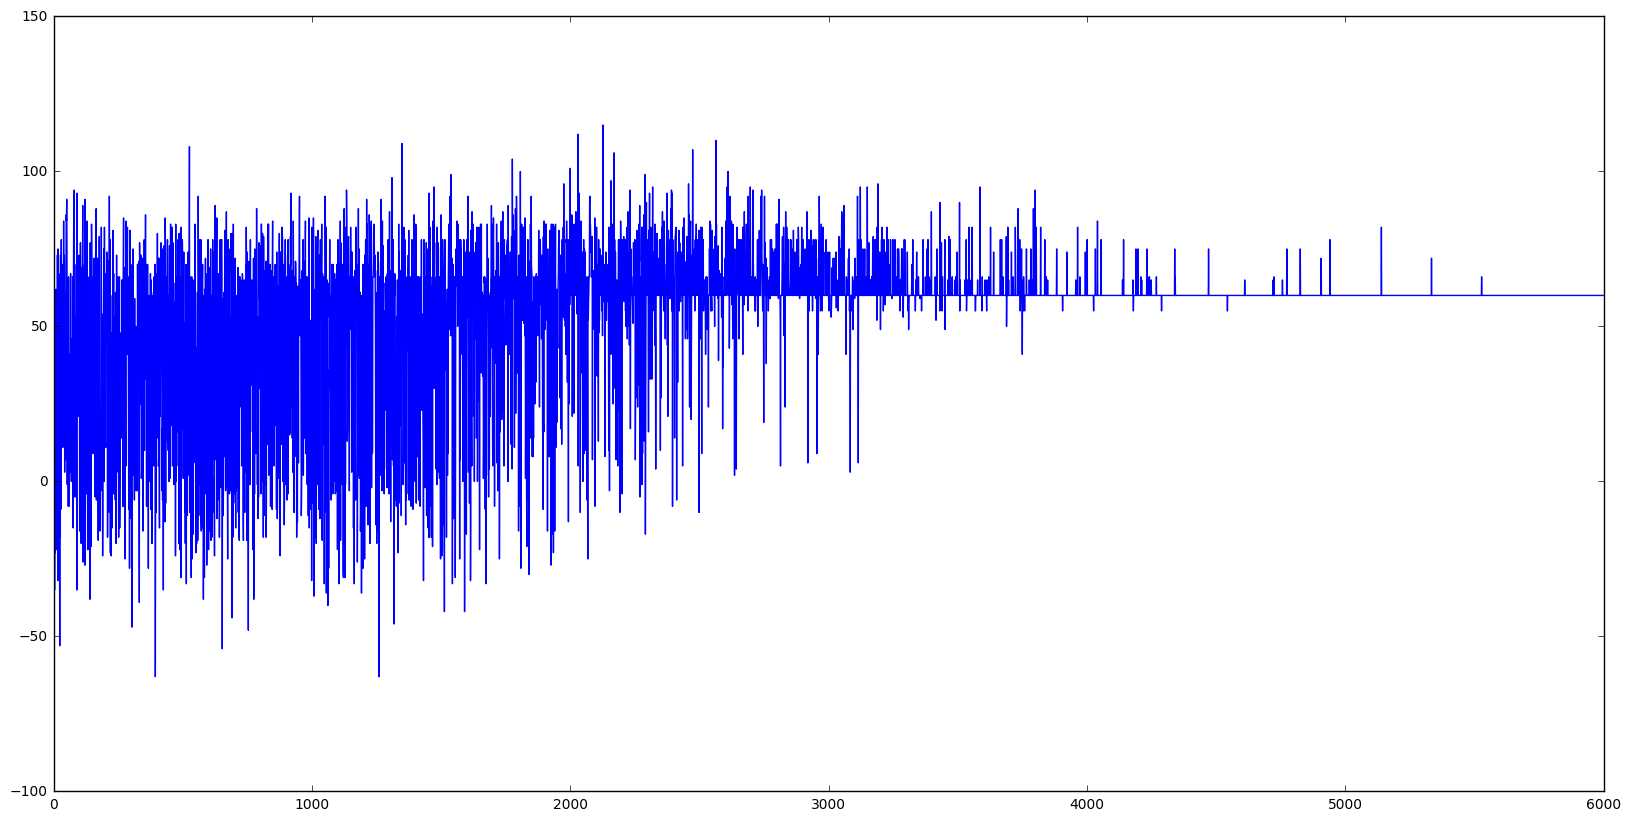

In [57]:
plt.figure(0, figsize=(20, 10))

plt.plot(all_rewards)
plt.show()